# Workflow of genomic data visualization using PyGenomeTrack

***
>This notebook contains a procedure to prepare the sequencing data and to create the region plots. 
The workflow describes the tools to convert the files into the formats: BED6, BED12, BAM, and BIGWIG. Additionally, we formed the helper functions to create .ini files from scratch.

> The [PyGenomeTrack](https://github.com/deeptools/pyGenomeTracks) aims to produce high-quality genome browser tracks.

> The main steps:
    0. Installation of requirements.
    1. Prepare your .gff3 files.
    2. Convert .gff3 into .bed6.
    3. Convert .gff3 into .bed12.
    4. Make .bigwig file from BAM/SAM format.
    5. Prepare the .ini files - from scrach or by edition of the example file.
    6. PyGenomeTracks - make tracks file.
    7. PyGenomeTracks - make region plot

> __HINT: Exclamation mark (!) at the beginning of line allows to use bash commands from the jupyter notebook.__
***

***
### Types of file formats used in this Notebook:
* [GFF3](https://www.ensembl.org/info/website/upload/gff3.html) - General Feature Format Version 3
* [BED6/BED12](https://genome.ucsc.edu/FAQ/FAQformat.html#format1) - Browser Extensible Data
* The [BIGWIG](https://genome.ucsc.edu/goldenPath/help/bigWig.html) format is useful for dense, continuous data that will be displayed in the Genome Browser as a graph.
* The __INI__ file format is an informal standard for configuration files.
* [SAM](https://samtools.github.io/hts-specs/SAMv1.pdf) - Sequence Alignment Map
* [BAM](https://genome.ucsc.edu/goldenPath/help/bam.html) is the compressed binary version of the Sequence Alignment/Map (SAM) format, a compact and index-able representation of nucleotide sequence alignment.
* [genePred](http://genome.ucsc.edu/FAQ/FAQformat#format9) is a table format commonly used for gene prediction tracks in the Genome Browser.
***

## 0. Installation of requirements

### A) Installation from file 'requirements.txt' using "pip install"
> __HINT:__ We recommend to install the requirements in a virtual environment to avoid inconsistencies in the local environment.

In [ ]:
!pip install -r requirements.txt 

### B)   Following tools couldn't be installed with "pip install". Install it in a different way, e.g., with bioconda.

In [ ]:
# Installation of PyGenomeTrack with Anaconda
!conda install -c bioconda pygenometracks 

In [ ]:
# Installation of gff3togenepred
!conda install ucsc-gff3togenepred

In [ ]:
# Update of gff3togenepred
!conda update ucsc-gff3togenepred

In [ ]:
# Installation of GenePredToBed
!conda install -c bioconda ucsc-genepredtobed

In [ ]:
# Installation of bedtools - example
!apt-get install bedtools

### C) Besides, download [BEDOPS](https://bedops.readthedocs.io/en/latest/) for your operating system and install it. BEDOPS contains samtools, sortbed, and bamtools.


***
## 1. Prepare your GFF3 and SAM/BAM files

> Please look carefully at your GFF3 file. Delete incorrect lines in your file.
***

***
## 2. Convert .gff3 into .bed6
    sortBed -i <gff3_file.gff3> | gff2bed > <bed_file.bed>
***

In [71]:
# Example
!sortBed -i newSP.gff3 | gff2bed > file_bed6.bed

In [82]:
# Sort Bed6:
!sort -k 1,1 -k2,2n file_bed6_sor1.bed > file_bed6_sorted.bed

In [46]:
# Sort Bed12:
!sort -k 1,1 -k2,2n file_bed12.bed > file_bed12_sorted.bed

***
## 3. Convert .gff3 into .bed12
    gff3ToGenePred infile.gff3 temp.genePre
    
> __HINT:__ Possible error 'CDS feature must have phase'. 
Phase is a parameter in column 8 of gff3 (only for features CDS).
Add phases in the gff3 file according to the notes below.
You can open your GFF3 file and add 0 in column 8 in the lines with CDS, e.g. using Regular Expressions
In case of another type of error, e.g. "Error: invalid genePred created: SPAC17G8.01c.1 I:2341250-2343947", look carefully at your gff3 and check if your exons are overlapping.


> "Phase specifies how many nucleotides must be removed from the beginning of a CDS to reach a complete codon 
(0, 1 or 2). If phase is missing, the CDS cannot be translated without making dangerous assumptions about 
the data. Specifically, you have to assume that the first CDS has a phase of 0. For poorly assembled genomes, 
this may not by the case.
Even if the assumption always holds, a CDS without phase data can be hard to work with since you cannot 
translate an individual CDS without considering the other members of the model.
According to the GFF specification, phase information is required for CDS entries and is stored 
in the 8th column." (Source: https://support.bioconductor.org/p/101245/ available: 2019.04.03)
***

In [6]:
# Sort the GFF3 file by column 1 (chromosomes) and 4 (start positions) as:
!sort -k1,1 -k4,4n newSP_phase.gff3 > newSP_phase_sorted.gff3

In [ ]:
# Creating the temporary file .genePred from gff3
!gff3ToGenePred newSP_phase_sorted.gff3 temp.genePred 

#"newSP_phase.gff3" is a gff3 file with phases in column 8.

In [42]:
# Creating BED file from temporary file
!genePredToBed temp.genePred file_bed12.bed

***
## 4. Make .bigwig file

### A) Conversion of SAM format to BAM format (if your data are in SAM)
        samtools view -S <sam_file.sam> -b -o <bam_file.bam>

In [ ]:
#Convert SAM to BAM
!samtools view -S short_C1_1.sam -b -o short_C1_1.bam

### B) Conversion of BAM format to BIGWIG using [bamCoverage](https://deeptools.readthedocs.io/en/develop/content/tools/bamCoverage.html#Required%20arguments) from deeptools

> Steps:
    1. Sort BAM file
        samtools sort -n <bam_file.bam>
    2. Add index to bam file
        samtools index <bam_file.bam>
    3. Convert indexed bam to bigwig
        bamCoverage -b <bamfile.bam> -o <bibwigfile.bw>
***

### Sort and add index to BAM file - it is a necessary step

In [1]:
# Sort the BAM file 
!samtools sort -n C1_long.bam

^C


In [ ]:
# Add index to BAM file
!samtools index -b C1_1.bam

### Make BIGWIG from indexed BAM

In [ ]:
# Convert indexed bam to bigwig
!bamCoverage -b C1_long.bam -o bigwig.bw

### [Separate tracks](https://deeptools.readthedocs.io/en/develop/content/tools/bamCoverage.html) for each strand (forward and reverse strands):

In [ ]:
# BigWig forward
!bamCoverage -b short_C1_1.bam -o bigwig_forward.bw --filterRNAstrand reverse

In [ ]:
# BigWig reverse
!bamCoverage -b short_C1_1.bam -o bigwig_reverse.bw --filterRNAstrand forward

### Short look at the bigwig file

In [ ]:
import pyBigWig

bw = pyBigWig.open("bigwig.bw")
bw.header()

***
## 5. Preparing the INI file

### A) Preparing the INI file by editing an existing file
>You can prepare your INI file from scratch (protocol below). However, we strongly recommend to use previously prepared INI files, and edit them (using helper functions or in a text editor).

>The examples of color names are [here](https://www.w3schools.com/colors/colors_picker.asp).

### B) Preparing of INI file from scratch -- using helper functions in ini_edit.py
> The helper functions allow to prepare a new ini file or to add some dictionary, section or file to existing ini file.

> All prepared helper functions are saved in file __ini_edit.py__. You can import the content of the file as below, and use all of the function in Python.

> __List of helper functions in ini_edit.py__: 
    * czytaj_konfig(nazwa_pliku)
    * zapisz_ini_ze_slownik(slownik, nazwa_pliku)
    * add_ini_slownik(slownik, nazwa_pliku, nowa_nazwa=None)
    * dopisz_do_konfig(konfig, slownik)

>#### Use belowed commend to look at the description of one of the helper functions in ini_edit.py :
    ?? ini_edit.add_ini_slownik  
***

In [ ]:
# Import ini_edit.py where are all helper functions
import ini_edit

In [10]:
# To look at the functions in 
?? ini_edit.add_ini_slownik

### The helper functions are also here: (PS. Some names are in Polish - I will change it soon)

In [11]:
"""
the 'helper functions' for reading and editing the INI files

słownik do ini ma zawsze formę:

slownik[nazwa_sekcji][nazwa_elementu]= wartosc_elementu

i to się zamieni w pliku ini na:

[nazwa sekcji]
nazwa_elementu = wartosc_elementu

"""
import configparser


def czytaj_konfig(nazwa_pliku):
    pass


def zapisz_ini_ze_slownik(slownik, nazwa_pliku):
    """zapisuje konfigurację ini na podstawie słownika

    Args:
        slownik (dict): slownik do zapisania
        nazwa_pliku (str): nazwa/ sciezka do pliku

    Slownik musi mieć formę, że dla każdego klucza,
    oznaczającego sekcję
    jest kolejny słownik zawierający poszczególne
    elementy
    
    Examples:
        >>> slownik={"UW":{"Faculty_of_Biology":"IGIB"}}
        >>> slownik["x-axis"]={"fontsize":20}
        >>> slownik["x-axis"]["where"]="top"
        >>> zapisz_konfig(slownik,"nowa_li_slownik.ini")
        plik nowa_li_slownik.ini zapisany

    """
    config = configparser.RawConfigParser()
    config.read_dict(slownik)
    config.write(open(nazwa_pliku, "w"))
    print("plik {} zapisany".format(nazwa_pliku))


def add_ini_slownik(slownik, nazwa_pliku, nowa_nazwa=None):
    """ Funkcja do pliku ini dopisuje dane ze słownika
    
    Args:
        slownik (dict): slownik z sekcjami i elementami
        nazwa_pliku (path): ścieżka do pliku ini który jest bazą do zmian
        nowa_nazwa (path): ścieżka do pliku ini który będzie wynikowym plikiem, plik opcjonalny (możemy nadpisać nazwa_pliku)
    
    Examples:
        >>> slownik_z_nowymi_rzeczami={"UW":{"Faculty_of_Biology":"IGIB"}}
        >>> add_ini_slownik(slownik_z_nowymi_rzeczami,"testtt.ini","nowy_nowy.ini")
    """
    config = configparser.RawConfigParser()
    config.read(nazwa_pliku)
    dopisz_do_konfig(config, slownik)
    if nowa_nazwa:
        nazwa_pliku=nowa_nazwa
    
    config.write(open(nazwa_pliku,"w"))
    print("zapisano pod nazwą", nazwa_pliku)


def dopisz_do_konfig(konfig, slownik):
    """do obiektu konfig dopisuje (w miejscu) elementy ze slownika
    Args:
        konfig (configparser.RawConfigParser): obiekt zawierajacy konfigurację
        slownik (dict): slownik z sekcjami i elementami
        
    """ 
    
    for nazwa_sekcji,slownik_sekcji in slownik.items():
        
        try:
            konfig.add_section(nazwa_sekcji)
        except :
            print("sekcja {} już istniała".format(nazwa_sekcji))
        
        for nazwa_el,wartosc_el in slownik_sekcji.items():
            konfig.set(nazwa_sekcji,nazwa_el,wartosc_el)
    

***
## 6. PyGenomeTracks - make tracks file
> Making tracks file is necessary to create the plot.

> __HINT:__ Make sure to take the right .bed, .bw, and .ini files.
If you change the name of BED file, you need to rewrite it in the .ini file.
***

### A) PyGenomeTrack using BED6:
> __HINT: If necessary, save your INI file after this step.__

#### PyGenomeTrack using BED6 and one BigWig file - made from BAM file containing both strains (plus and minus):

In [ ]:
# PyGenomeTrack using BED6 and one BigWig file - made from BAM file containing both strains (plus and minus) 
!make_tracks_file --trackFiles file_bed6_sorted.bed bigwig_bed6.bw -o ini_file_BED6.ini

#### PyGenomeTrack using BED6 and two BigWig files - made from BAM files containing only one strain (plus or minus)

In [1]:
# PyGenomeTrack using BED6 and two BigWig files - made from BAM files containing only one strain (plus or minus) 
!make_tracks_file --trackFiles file_bed6_sorted.bed bigwig_reverse.bw bigwig_forward.bw -o ini_file_BED6_podwojny_bw.ini

Adding bed file: file_bed6_sorted.bed
Adding bigwig file: bigwig_reverse.bw
Adding bigwig file: bigwig_forward.bw


### B) PyGenomeTrack using BED12:

#### PyGenomeTrack using BED12 and one BigWig file - made from BAM file containing both strains (plus and minus) 

In [ ]:
# PyGenomeTrack using BED12 and one BigWig file - made from BAM file containing both strains (plus and minus) 
!make_tracks_file --trackFiles file_bed12_sorted.bed bigwig_bed6.bw -o ini_file_BED12.ini

#### PyGenomeTrack using BED12 and two BigWig files - made from BAM files containing only one strain (plus or minus)

In [6]:
# PyGenomeTrack using BED12 and two BigWig files - made from BAM files containing only one strain (plus or minus)
!make_tracks_file --trackFiles file_bed12_sorted.bed bigwig_reverse.bw bigwig_forward.bw -o ini_file_BED12_2bw.ini

Adding bed file: file_bed12_sorted.bed
Adding bigwig file: bigwig_reverse.bw
Adding bigwig file: bigwig_forward.bw


***
## 7. PyGenomeTracks - make region plot

> ##### Create region plot and save it as .png or .pdf
    !pyGenomeTracks --tracks <ini_file.ini> --region I:1,800,000-1,820,000 --outFileName <png_file.png>
    !pyGenomeTracks --tracks <ini_file.ini> --region I:1,800,000-1,820,000 --outFileName <pdf_file.pdf>
***

### A) The example region plot using BED6 format:
> If you want to have different colors for genes, UTRs, etc., mark it in column 5 in the bed6 file.
> To prepare plot with two BigWig files (for + and - strains), please add section od second BigWig in your INI file, like in th example.

In [4]:
# Create the region plot
!pyGenomeTracks --tracks ini_file_BED6_podwojny_bw.ini --region I:250,000-275,000 --outFileName bed6_twoBigWig_6.png
# !pyGenomeTracks --tracks ini_file_BED6.ini --region I:1,000,000-1,050,000 --outFileName bed6_1.pdf

INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:4.064293384552002
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 13.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
/home/lidka/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [file_bed6_sorted]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 2859.9999999999995,0
INFO:pygenometracks.tracksClass:plotting 4. [bigwig_forward]
INFO:pygenometracks.tracksClass:plotting 5. [bigwig_reverse]


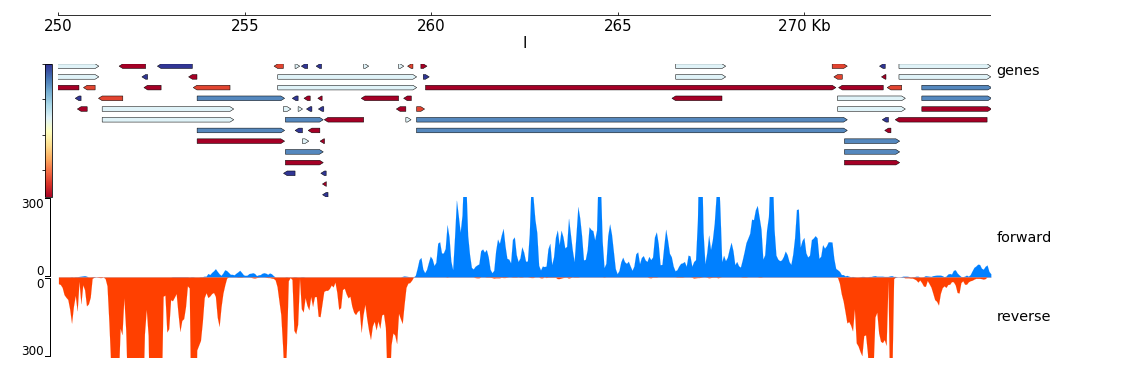

In [5]:
# Look at the new plot
from IPython.display import Image

#The name of the new file (.png) with plot showing genomic location
#
# Just copy the name of new .png file

png_bed6 = "bed6_twoBigWig_6.png"
Image(png_bed6)

### B) The example region plot using BED12 format:

In [11]:
# Create the region plot
!pyGenomeTracks --tracks ini_file_BED12_2bw.ini --region I:250,000-275,000 --outFileName bed12_2bw_9.png
# !pyGenomeTracks --tracks ini_file_BED12.ini --region I:1,000,000-1,050,000 --outFileName bed12_3.pdf

INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:1.6245827674865723
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 12.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
/home/lidka/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [file_bed12_sorted]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 789.9999999999999,0
INFO:pygenometracks.tracksClass:plotting 4. [bigwig_forward]
INFO:pygenometracks.tracksClass:plotting 5. [bigwig_reverse]


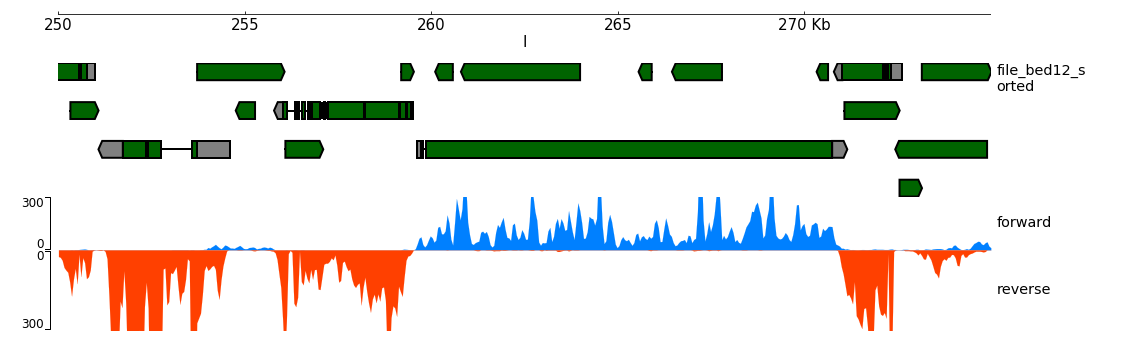

In [12]:
# Look at the new plot
from IPython.display import Image

#The name of the new file (.png) with plot showing genomic location
#
# Just copy the name of new .png file

png_file_name_bed12 = "bed12_2bw_9.png"
Image(png_file_name_bed12)

***
#### ~ Have fun ~
***